In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 样本特征
data_X = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 3.3],
    [2, 9],
    [5, 7.5],
    [7.2, 4],
    [8.1, 8],
    [9,2.5]
]

In [3]:
# 样本标记
data_y = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7]

In [4]:
# 训练集
X_train = np.array(data_X)
y_train = np.array(data_y)

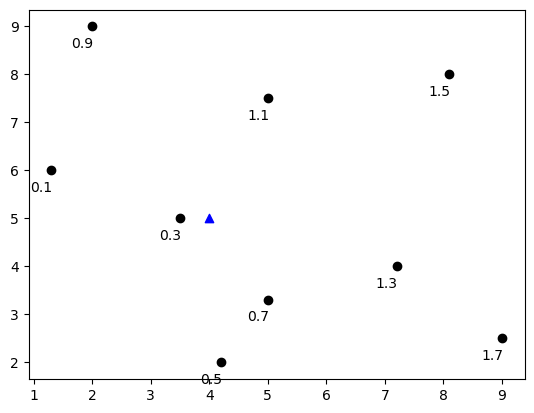

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], color='black')

data_new = np.array([4,5])

plt.scatter(data_new[0], data_new[1], color = 'blue', marker='^')

for i in range(len(y_train)):
    plt.annotate(y_train[i], (X_train[i, 0], X_train[i, 1]), xytext=(-15,-15), textcoords="offset points")
plt.show()

#### 1 计算新样本与已知样本点之间的距离

In [6]:
for data in X_train:
      print(np.sqrt(np.sum((data - data_new) ** 2)))

2.879236009777594
0.5
3.006659275674582
1.9723082923316022
4.47213595499958
2.692582403567252
3.3526109228480423
5.080354318352215
5.5901699437494745


In [7]:
distances = [np.sqrt(np.sum((data - data_new) ** 2)) for data in X_train]

#### 2. 按照距离排序

In [8]:
sort_index = np.argsort(distances)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64)

#### 3. 确定k值

In [9]:
k = 5

#### 4. 最近的k个点投票表决

In [10]:
first_k = [y_train[i] for i in sort_index[:k]]

In [11]:
np.mean(first_k)

0.54

#### scikit-learn KNN回归

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knn_regressor = KNeighborsRegressor(n_neighbors = 5)

In [14]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
knn_regressor.predict(data_new.reshape([1, -1]))

array([0.54])

### Boston 数据集

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [19]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [20]:
X.shape, y.shape

((506, 13), (506,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=233)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 5, weights ='distance', p=2)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
knn_regressor.score(X_test, y_test)

0.4650695724994245

### 归一化

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train = scaler.transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
knn_regressor.score(X_test, y_test)

0.7723978326161046